In [1]:
# Reference based on mathematical description -> https://zephyrus1111.tistory.com/
# Referred from https://ysyblog.tistory.com/262?category=1186605
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

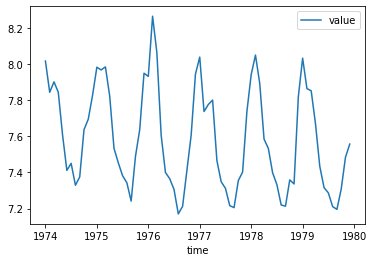

In [12]:
data = sm.datasets.get_rdataset('deaths','MASS')
raw = data.data
raw.value = np.log(raw.value)
raw.plot(x='time',y='value')
plt.show()

c:\python\python38\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


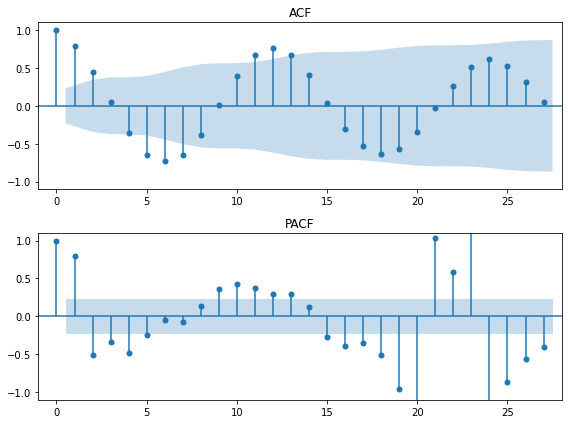

In [25]:
plt.figure(figsize=(8,6))
sm.graphics.tsa.plot_acf(raw.value.values, lags=27, ax=plt.subplot(211))
plt.xlim(-1,28)
plt.ylim(-1.1,1.1)
plt.title('ACF')
sm.graphics.tsa.plot_pacf(raw.value.values, lags=27, ax=plt.subplot(212))
plt.xlim(-1,28)
plt.ylim(-1.1,1.1)
plt.title('PACF')
plt.tight_layout()
plt.show()

In [27]:
model1 = sm.tsa.SARIMAX(raw.value, trend='c', order=(1,0,1), seasonal_order=(0,0,0,0)).fit()
display(model1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   72
Model:               SARIMAX(1, 0, 1)   Log Likelihood                  31.982
Date:                Thu, 20 Jan 2022   AIC                            -55.965
Time:                        18:10:44   BIC                            -46.858
Sample:                             0   HQIC                           -52.339
                                 - 72                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4194      0.765      3.161      0.002       0.919       3.920
ar.L1          0.6818      0.100      6.846      0.000       0.487       0.877
ma.L1          0.4668      0.116      4.027      0.000       0.240       0.694
sigma2         0.0236      0.004      5.416      0.000       0.015       0.032
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                12.13
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.94
Prob(H) (two-sided):                  0.99   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\python\python38\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


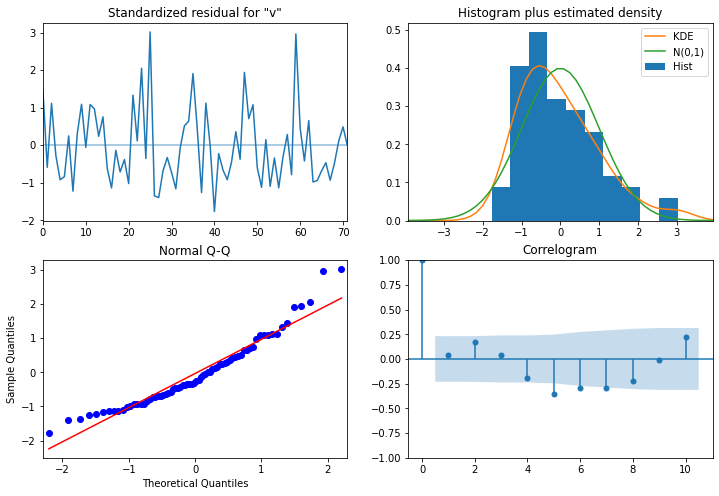

In [29]:
model1.plot_diagnostics(figsize=(12,8))
plt.show()

In [30]:
model2 = sm.tsa.SARIMAX(raw.value, trend='c', order=(1,0,1), seasonal_order=(1,1,1,12)).fit()
display(model2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   72
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                  52.592
Date:                            Thu, 20 Jan 2022   AIC                            -93.185
Time:                                    18:13:00   BIC                            -80.619
Sample:                                         0   HQIC                           -88.270
                                             - 72                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0480      0.022     -2.211      0.027      -0.091      -0.005
ar.L1         -0.1544      0.435     -0.355      0.723      -1.007       0.699
ma.L1          0.5699      0.273      2.091      0.037       0.036       1.104
ar.S.L12      -0.2871      0.203     -1.411      0.158      -0.686       0.112
ma.S.L12      -0.9727      5.271     -0.185      0.854     -11.303       9.358
sigma2         0.0065      0.034      0.195      0.846      -0.059       0.072
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                74.34
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             0.99
Prob(H) (two-sided):                  0.32   Kurtosis:                         8.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\python\python38\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


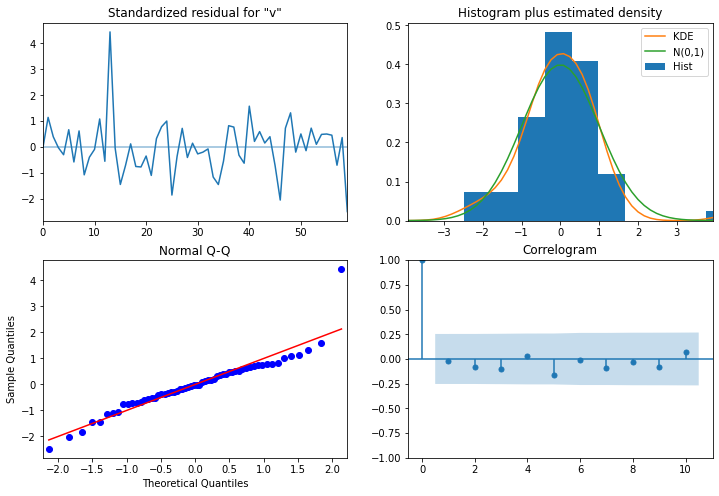

In [31]:
model2.plot_diagnostics(figsize=(12,8))
plt.show()

In [32]:
data2 = sm.datasets.get_rdataset('AirPassengers')
raw2 = data2.data.copy()

In [35]:
if 'time' in raw2.columns:
    raw2.index = pd.date_range(start='1/1/1949', periods=len(raw2['time']), freq='M')
    del raw2['time']

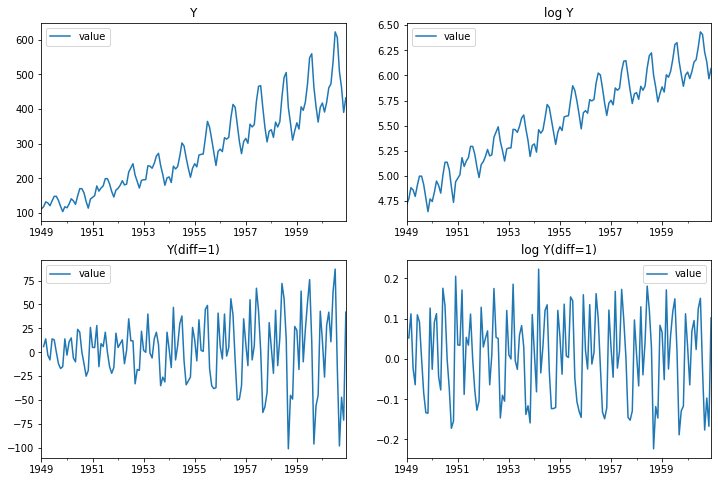

In [43]:
plt.figure(figsize=(12,8))
raw2.plot(ax=plt.subplot(221), title='Y')
np.log(raw2).plot(ax=plt.subplot(222), title='log Y')
raw2.diff(1).plot(ax=plt.subplot(223), title='Y(diff=1)')
np.log(raw2).diff(1).plot(ax=plt.subplot(224), title='log Y(diff=1)')
plt.show()

In [44]:
fit1 = sm.tsa.SARIMAX(raw2.value, trend='c', order=(1,1,1), seasonal_order=(0,0,0,0)).fit()
display(fit1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  144
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -694.060
Date:                Thu, 20 Jan 2022   AIC                           1396.121
Time:                        18:29:48   BIC                           1407.972
Sample:                    01-31-1949   HQIC                          1400.937
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.6187      5.001      0.724      0.469      -6.183      13.421
ar.L1         -0.4768      0.128     -3.736      0.000      -0.727      -0.227
ma.L1          0.8646      0.080     10.746      0.000       0.707       1.022
sigma2       958.4116    107.040      8.954      0.000     748.616    1168.207
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 2.17
Prob(Q):                              0.64   Prob(JB):                         0.34
Heteroskedasticity (H):               7.01   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\python\python38\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


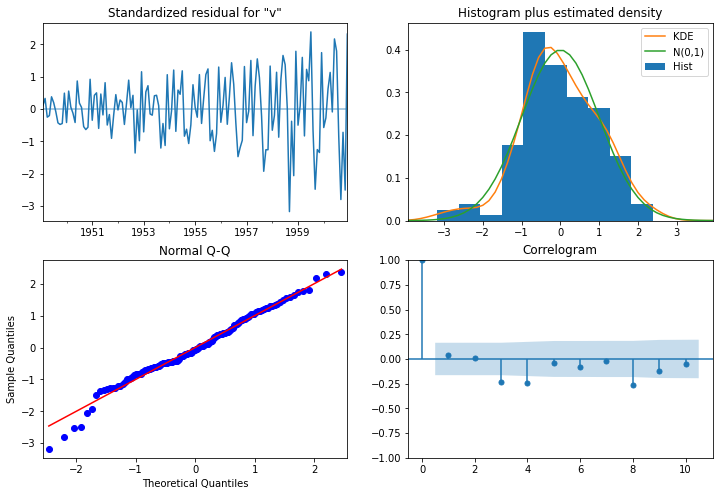

In [45]:
fit1.plot_diagnostics(figsize=(12,8))
plt.show()

In [46]:
fit2 = sm.tsa.SARIMAX(np.log(raw2.value), trend='c', order=(1,1,1), seasonal_order=(0,0,0,0)).fit()
display(fit2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  144
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 124.804
Date:                Thu, 20 Jan 2022   AIC                           -241.608
Time:                        18:31:16   BIC                           -229.756
Sample:                    01-31-1949   HQIC                          -236.792
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0155      0.016      0.963      0.336      -0.016       0.047
ar.L1         -0.5826      0.170     -3.430      0.001      -0.916      -0.250
ma.L1          0.8502      0.101      8.455      0.000       0.653       1.047
sigma2         0.0102      0.002      5.871      0.000       0.007       0.014
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 5.92
Prob(Q):                              0.87   Prob(JB):                         0.05
Heteroskedasticity (H):               1.07   Skew:                             0.04
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\python\python38\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


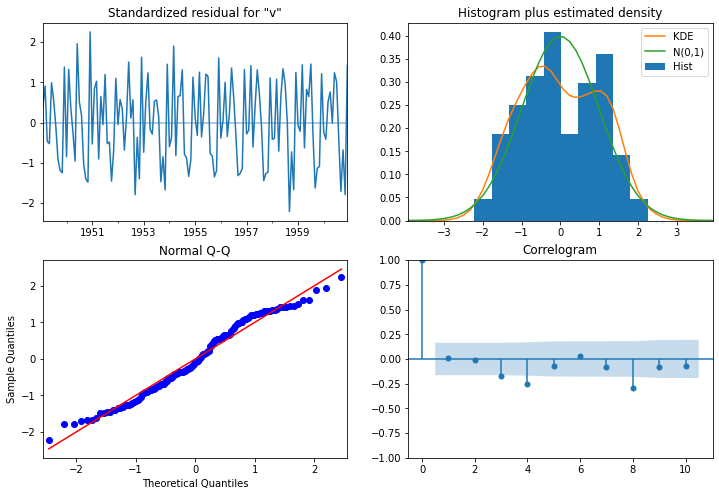

In [47]:
fit2.plot_diagnostics(figsize=(12,8))
plt.show()

In [48]:
fit3 = sm.tsa.SARIMAX(np.log(raw2.value), trend='c', order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
display(fit3.summary())

c:\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 244.841
Date:                            Thu, 20 Jan 2022   AIC                           -477.682
Time:                                    18:32:12   BIC                           -460.431
Sample:                                01-31-1949   HQIC                          -470.672
                                     - 12-31-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.001     -0.161      0.872      -0.003       0.002
ar.L1         -0.0191      0.204     -0.094      0.925      -0.419       0.381
ma.L1         -0.4089      0.190     -2.150      0.032      -0.782      -0.036
ar.S.L12      -0.1611      0.195     -0.824      0.410      -0.544       0.222
ma.S.L12      -0.4271      0.220     -1.942      0.052      -0.858       0.004
sigma2         0.0013      0.000      8.837      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.76
Prob(Q):                              0.79   Prob(JB):                         0.41
Heteroskedasticity (H):               0.59   Skew:                             0.03
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\python\python38\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


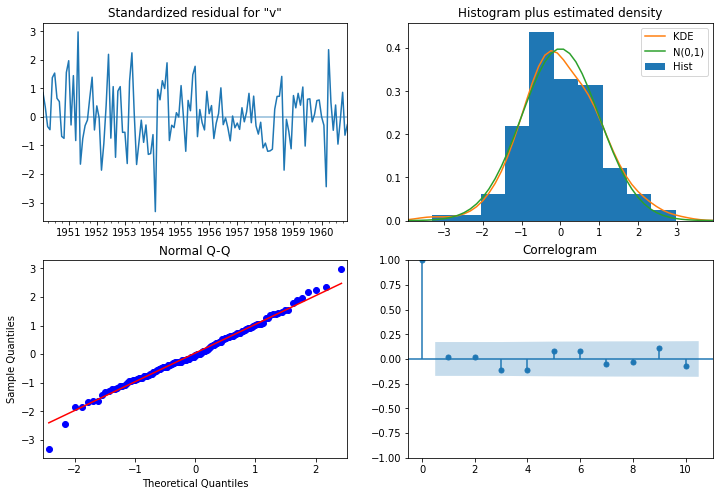

In [49]:
fit3.plot_diagnostics(figsize=(12,8))
plt.show()